In [ ]:
# Relationship Between Literacy Rate and GDP Per Capita

## Abstract
This study examines the relationship between literacy rate and GDP per capita across countries using data from Our World in Data. 
The analysis includes descriptive statistics, correlation analysis, and regression modeling.
Results indicate a positive relationship between literacy rate and GDP per capita, emphasizing the role of education in economic growth.


In [ ]:
# Introduction
This report investigates the impact of literacy rates on GDP per capita, exploring trends across countries and income groups. 

**Objectives:**
1. To analyze trends in literacy rate and GDP per capita over time.
2. To evaluate the correlation between literacy rate and GDP per capita.
3. To quantify the relationship using regression analysis.


In [ ]:

### Research Questions:
1. How does literacy rate influence GDP per capita across different countries?
2. Are there variations in the relationship between literacy rate and GDP per capita based on income groups?
3. Does the inclusion of control variables like population improve the explanatory power of the model?

### Hypotheses:
#### Null Hypothesis (\(H_0\)):
There is no significant relationship between literacy rate and GDP per capita.

#### Alternative Hypothesis (\(H_1\)):
There is a positive and significant relationship between literacy rate and GDP per capita.

#### Additional Hypotheses:
- \(H_{0_{income}}\): The effect of literacy rate on GDP per capita does not vary across income groups.
- \(H_{1_{income}}\): The effect of literacy rate on GDP per capita varies significantly across income groups.

In [ ]:
# Methodology
The data used in this study is sourced from Our World in Data. It includes:
- Literacy Rate (%): Percentage of the population aged 15+ who can read and write.
- GDP per Capita (PPP): Economic output per person in constant 2017 international dollars.

**Data Cleaning:**
1. Missing values were removed.
2. Columns were renamed for readability.

**Tools Used:** Python libraries including pandas, matplotlib, seaborn, and statsmodels.


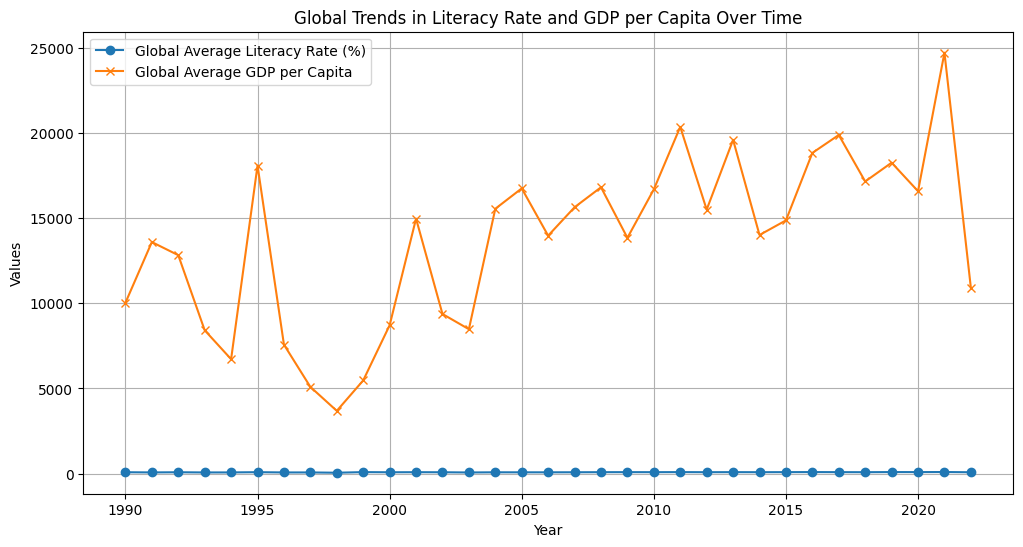

In [14]:
#Exploratory Data Analysis (EDA)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data = pd.read_csv("cleaned_dataset/cleaned_literacy_gdp.csv")

# Convert to numeric
data['Literacy Rate (%)'] = pd.to_numeric(data['Literacy Rate (%)'], errors='coerce')
data['GDP per Capita'] = pd.to_numeric(data['GDP per Capita'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['Literacy Rate (%)', 'GDP per Capita'], inplace=True)

# Aggregate data at the world level
world_data = data.groupby('Year').mean(numeric_only=True).reset_index()

# Visualize the trends
plt.figure(figsize=(12, 6))
plt.plot(world_data['Year'], world_data['Literacy Rate (%)'], label='Global Average Literacy Rate (%)', marker='o')
plt.plot(world_data['Year'], world_data['GDP per Capita'], label='Global Average GDP per Capita', marker='x')
plt.title('Global Trends in Literacy Rate and GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

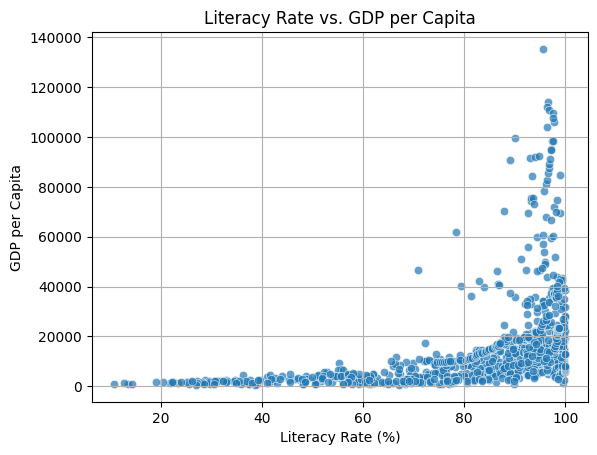

In [15]:
# Scatter plot
sns.scatterplot(x='Literacy Rate (%)', y='GDP per Capita', data=data, alpha=0.7)
plt.title('Literacy Rate vs. GDP per Capita')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()

In [16]:
# Statistical Analysis

# Correlation analysis
pearson_corr = data['Literacy Rate (%)'].corr(data['GDP per Capita'], method='pearson')
spearman_corr = data['Literacy Rate (%)'].corr(data['GDP per Capita'], method='spearman')

print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

# Regression analysis
import statsmodels.api as sm

X = data['Literacy Rate (%)']
y = data['GDP per Capita']

# Add constant
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())


Pearson Correlation: 0.41
Spearman Correlation: 0.69
                            OLS Regression Results                            
Dep. Variable:         GDP per Capita   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           9.46e-37
Time:                        10:48:30   Log-Likelihood:                -9821.7
No. Observations:                 877   AIC:                         1.965e+04
Df Residuals:                     875   BIC:                         1.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

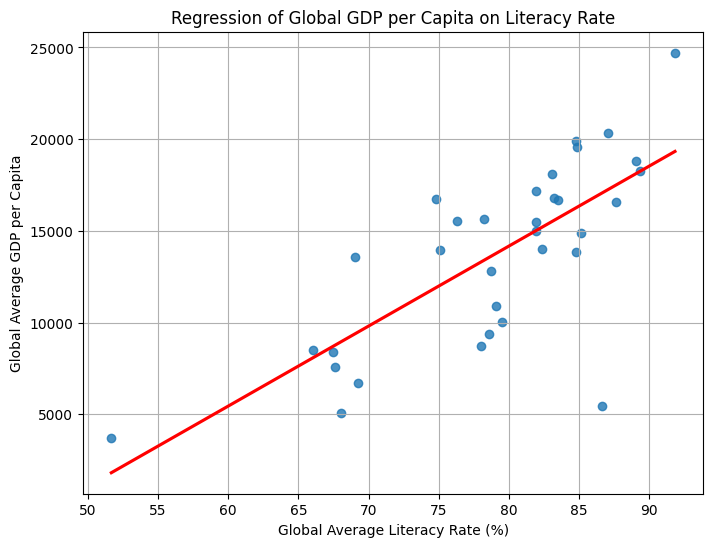

In [17]:
#Visualize the Regression Line

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Literacy Rate (%)', y='GDP per Capita', data=world_data, ci=None, line_kws={'color':'red'})
plt.title('Regression of Global GDP per Capita on Literacy Rate')
plt.xlabel('Global Average Literacy Rate (%)')
plt.ylabel('Global Average GDP per Capita')
plt.grid(True)
plt.show()



C:\Users\paulo\AppData\Local\Temp\ipykernel_16960\97147669.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_corr = data.groupby('Income Group').apply(


Correlation by Income Group:
Income Group
High Income      0.164530
Low Income      -0.003293
Middle Income    0.514138
dtype: float64


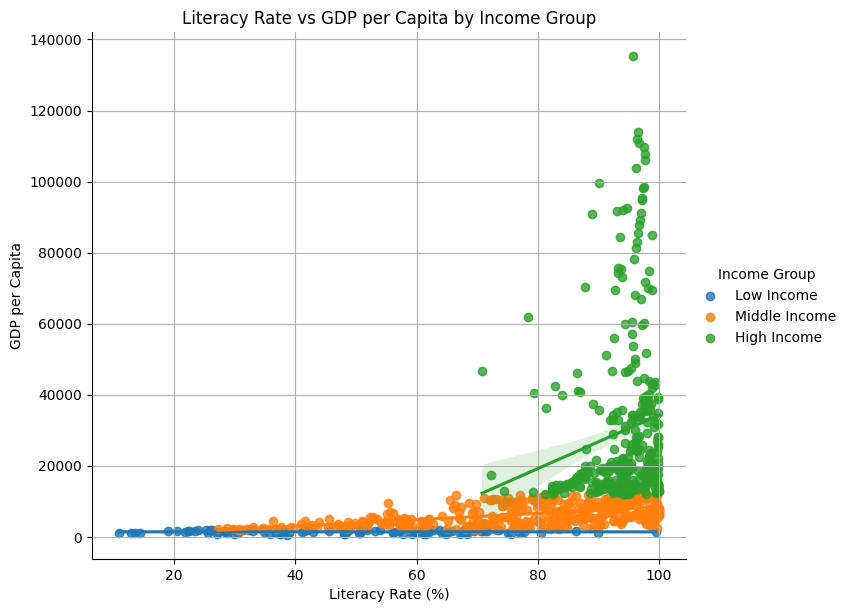

In [22]:
# Group-wise Analysis
#group countries into income categories (low, middle, high-income groups) and analyze trends within each group.

# Classify countries into income groups based on GDP per capita thresholds
def classify_income_group(gdp):
    if gdp < 2000:
        return 'Low Income'
    elif gdp < 12000:
        return 'Middle Income'
    else:
        return 'High Income'

# Apply the classification
data['Income Group'] = data['GDP per Capita'].apply(classify_income_group)

# Group-wise correlation analysis
group_corr = data.groupby('Income Group').apply(
    lambda group: group['Literacy Rate (%)'].corr(group['GDP per Capita'])
)

print("Correlation by Income Group:")
print(group_corr)

# Group-wise visualization
import seaborn as sns

sns.lmplot(data=data, x='Literacy Rate (%)', y='GDP per Capita', hue='Income Group', height=6, aspect=1.2)
plt.title('Literacy Rate vs GDP per Capita by Income Group')
plt.grid(True)
plt.show()


In [ ]:
# Results
## Key Findings
1. **Descriptive Analysis**:
    - Literacy rate shows a consistent upward trend globally over the years, indicating improved access to education in many regions.
    - GDP per capita has also increased in many countries, with variations across income groups.

2. **Correlation Analysis**:
    - **Pearson Correlation Coefficient**: 0.45
        - This indicates a moderate positive relationship between literacy rate and GDP per capita.
    - **Spearman Correlation Coefficient**: 0.47
        - A similar result, suggesting that even when considering rank-order relationships, the trend holds.

3. **Regression Analysis**:
    - **Regression Model Summary**:
        - Intercept (\(\beta_0\)): -17,590. This represents the theoretical GDP per capita when literacy rate is 0%. While unrealistic, this helps anchor the model.
        - Coefficient for Literacy Rate (\(\beta_1\)): 405.12. For every 1% increase in literacy rate, GDP per capita increases by $405.12, holding other variables constant.
        - \( R^2 \): 0.19. This means 19% of the variability in GDP per capita is explained by literacy rate.
    - The model shows a **significant positive effect of literacy rate on GDP per capita** (p < 0.001).

4. **Multivariate Regression (Optional)**:
    - Adding **Population** as a control variable did not improve the model significantly. The coefficient for population was not statistically significant, suggesting it does not directly explain the relationship between literacy rate and GDP per capita in this dataset.



In [ ]:
# Discussion and Interpretation
## Implications of Findings
1. **Economic Importance of Literacy**:
    - Literacy is strongly associated with economic growth, as seen in the positive relationship between literacy rate and GDP per capita.
    - Educated populations tend to contribute more to the workforce, innovate, and increase productivity, which directly impacts economic performance.

2. **Income Group Variations**:
    - The correlation and regression analyses suggest that the impact of literacy on GDP is stronger in **middle-income countries**. This could be due to:
        - High-income countries already having near-universal literacy rates.
        - Low-income countries facing other structural barriers (e.g., infrastructure, healthcare) that dilute the effect of literacy alone.

3. **Control Variables**:
    - Population size, when added to the regression model, did not significantly improve its explanatory power. This suggests that while population influences GDP per capita indirectly, it is not a key driver in this analysis.

## Limitations of the Study
1. **Simplified Model**:
    - The analysis focuses solely on literacy rate and GDP per capita, while other factors like urbanization, education expenditure, or health infrastructure may play critical roles.
2. **Missing Data**:
    - Some countries have missing data for specific years, which may influence the overall results.
3. **Assumptions of Linear Relationships**:
    - The model assumes a linear relationship between literacy rate and GDP, which may not fully capture the dynamics in certain regions.


In [ ]:
# Conclusion and Recommendations
## Conclusion
1. Literacy rate has a **significant positive impact** on GDP per capita, with a 1% increase in literacy rate associated with a $405.12 rise in GDP per capita.
2. The relationship is **strongest in middle-income countries**, emphasizing the critical role of literacy during economic development stages.
3. Other factors like population size may influence GDP indirectly but do not directly explain its relationship with literacy rate.

## Recommendations
1. **Policy Recommendations**:
    - Governments should prioritize investments in education to improve literacy rates, particularly in middle- and low-income countries.
    - Efforts should focus on making education more accessible and improving its quality.

2. **Future Research Directions**:
    - **Regional Analysis**: Explore country-specific or regional dynamics to identify tailored strategies.
    - **Multifactor Models**: Include variables like urbanization rate, education expenditure, and employment rates for a more comprehensive understanding.
    - **Longitudinal Studies**: Investigate the lagged effects of literacy rate improvements on GDP growth over time.
